## Fourier transforms

### 1-D discrete Fourier transforms


The FFT y[k] of length N of the length-N sequence x[n] is defined as



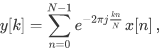

and the inverse transform is defined as follows

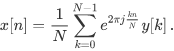

These transforms can be calculated by means of fft and ifft, respectively, as shown in the following example.

In [2]:
from scipy.fft import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

y = fft(x)

y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [3]:
yinv = ifft(y)

yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

From the definition of the FFT it can be seen that


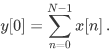

In the example

In [4]:
np.sum(x)

4.5

which corresponds y[0] to . For N even, the elements y[1]...y[N/2-1] contain the positive-frequency terms, and the elements y[N/2]...y[N-1]contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N-1)/2]  contain the positive-frequency terms, and the elements [(N+1)/2]...y[N-1] contain the negative-frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n]
for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.

The example plots the FFT of the sum of two sines.

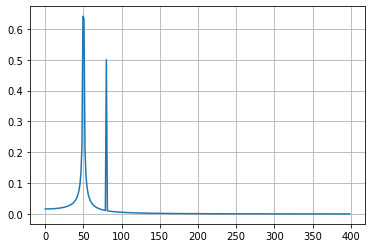

In [5]:
from scipy.fft import fft, fftfreq

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()

he FFT input signal is inherently truncated. This truncation can be modeled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form sin(x)/x. This convolution is the cause of an effect called spectral leakage (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

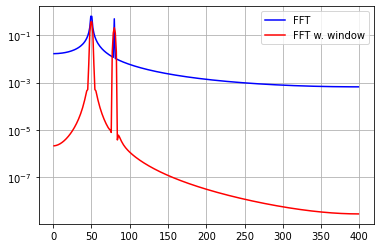

In [6]:
from scipy.fft import fft, fftfreq

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

from scipy.signal import blackman

w = blackman(N)

ywf = fft(y*w)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')

plt.legend(['FFT', 'FFT w. window'])

plt.grid()

plt.show()

In case the sequence x is complex-valued, the spectrum is no longer symmetric. To simplify working with the FFT functions, scipy provides the following two helper functions.

The function fftfreq returns the FFT sample frequency points.

In [8]:
from scipy.fft import fftfreq

freq = fftfreq(8, 0.125)

freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In a similar spirit, the function fftshift allows swapping the lower and upper halves of a vector, so that it becomes suitable for display.

In [9]:
from scipy.fft import fftshift

x = np.arange(8)

fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

The example below plots the FFT of two complex exponentials; note the asymmetric spectrum.

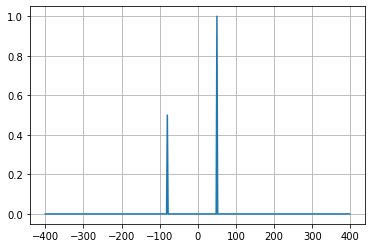

In [10]:
from scipy.fft import fft, fftfreq, fftshift

# number of signal points

N = 400

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)

xf = fftshift(xf)

yplot = fftshift(yf)

import matplotlib.pyplot as plt

plt.plot(xf, 1.0/N * np.abs(yplot))

plt.grid()

plt.show()

The function rfft calculates the FFT of a real sequence and outputs the complex FFT coefficients y[n] for only half of the frequency range. The remaining negative frequency components are implied by the Hermitian symmetry of the FFT for a real input (y[n] = conj(y[-n])). In case of N being even:image.png; in case of N being odd image.png. The terms shown explicitly as image.png are restricted to be purely real since, by the hermitian property, they are their own complex conjugate.

In [11]:
from scipy.fft import fft, rfft, irfft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])

fft(x)

array([ 5.5 -0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 -0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [12]:
yr = rfft(x)

yr

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        ])

In [13]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [14]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])

fft(x)

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [15]:
yr = rfft(x)

yr

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j])

Notice that the rfft of odd and even length signals are of the same shape. By default, irfft assumes the output signal should be of even length. And so, for odd signals, it will give the wrong result:

In [16]:
irfft(yr)

array([ 1.70788987,  2.40843925, -0.37366961,  0.75734049])

To recover the original odd-length signal, we must pass the output shape by the n parameter.

In [17]:
irfft(yr, n=len(x))

array([ 1. ,  2. ,  1. , -1. ,  1.5])

### 2- and N-D discrete Fourier transforms

The functions fft2 and ifft2 provide 2-D FFT and IFFT, respectively. Similarly, fftn and ifftn provide N-D FFT, and IFFT, respectively.

For real-input signals, similarly to rfft, we have the functions rfft2 and irfft2 for 2-D real transforms; rfftn and irfftn for N-D real transforms.

The example below demonstrates a 2-D IFFT and plots the resulting (2-D) time-domain signals.

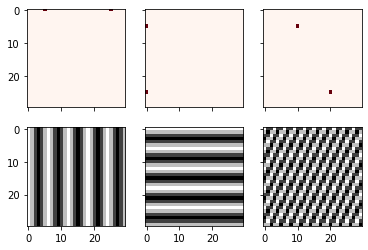

In [18]:
from scipy.fft import ifftn

import matplotlib.pyplot as plt

import matplotlib.cm as cm

N = 30

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

xf = np.zeros((N,N))

xf[0, 5] = 1

xf[0, N-5] = 1

Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)

ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))

xf[5, 0] = 1

xf[N-5, 0] = 1

Z = ifftn(xf)

ax2.imshow(xf, cmap=cm.Reds)

ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))

xf[5, 10] = 1

xf[N-5, N-10] = 1

Z = ifftn(xf)

ax3.imshow(xf, cmap=cm.Reds)

ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()